In [29]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

These are the features

In [5]:
df.shape

(150, 5)

There are total 150 records

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null entries in the dataset

# EDA

Text(0.5, 1.0, 'Sepal_length Vs Sepal_width')

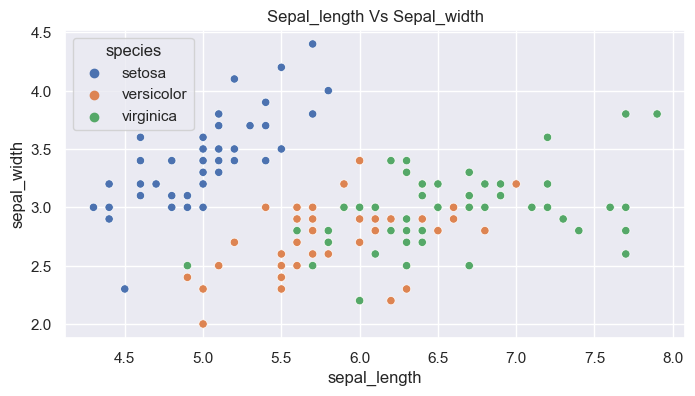

In [8]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species")
plt.title("Sepal_length Vs Sepal_width")

Text(0.5, 1.0, 'Petal_length Vs Petal_width')

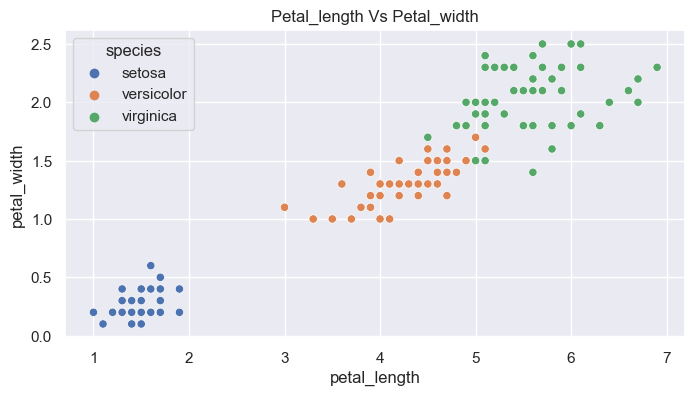

In [9]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.scatterplot(data=df,x="petal_length",y="petal_width",hue="species")
plt.title("Petal_length Vs Petal_width")

sns.set(rc={"figure.figsize":(8, 4)})
sns.kdeplot(data=df)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

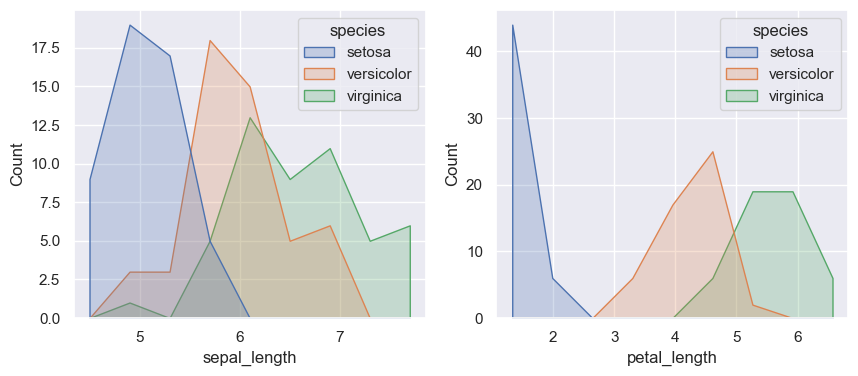

In [10]:
sns.set(rc={"figure.figsize":(10, 4)})
fig, axes = plt.subplots(1, 2)
sns.histplot(data=df,x="sepal_length",hue="species",element="poly",ax=axes[0])
sns.histplot(data=df,x="petal_length",hue="species",element="poly",ax=axes[1])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

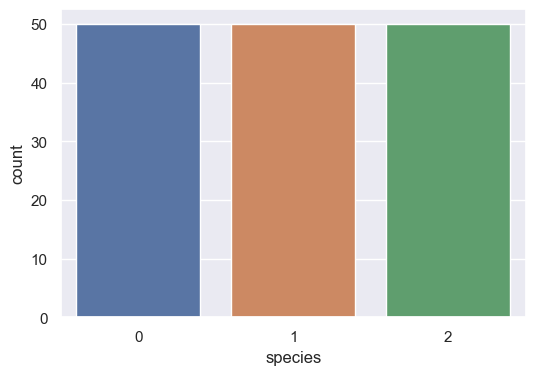

In [30]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.countplot(df["species"])

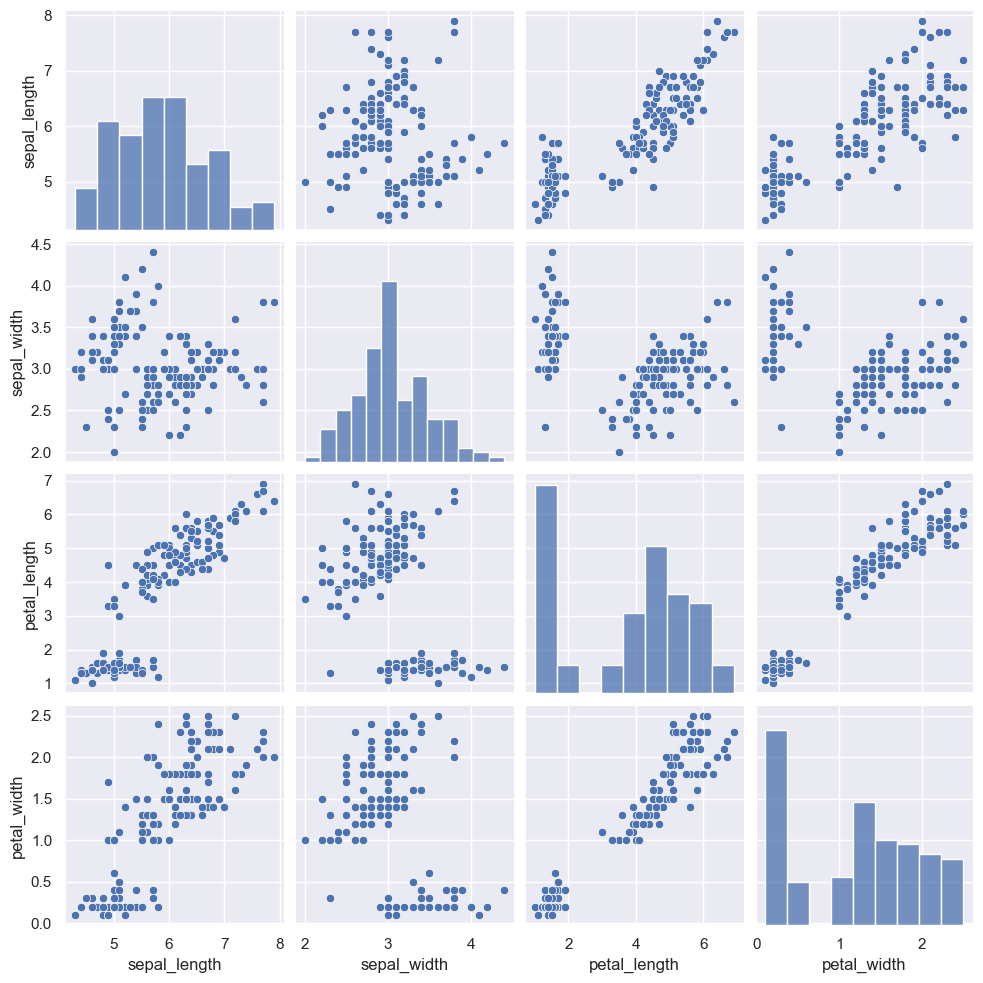

In [12]:
sns.pairplot(data=df)

In [13]:
lb=LabelEncoder()
df["species"]=lb.fit_transform(df["species"])

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Scaling the features

In [15]:
MM=StandardScaler()
features=["sepal_length","sepal_width","petal_length","petal_width"]
df[features]=MM.fit_transform(df[features])

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


<AxesSubplot:ylabel='Density'>

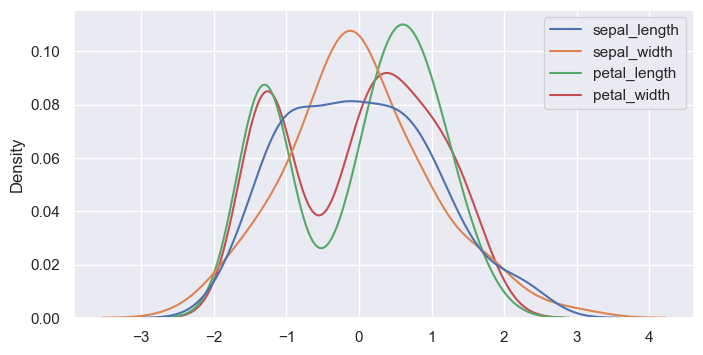

In [17]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.kdeplot(data=df[features])

All the feature values are scaled down

# Deciding model which fits best for the dataset

In [18]:
X=df.drop(["species"],axis=1)
Y=df["species"]

In [19]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'logistic_reg': {
            'model': LogisticRegression(),
            'params': {
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'n_estimators':[20,50,100]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [20]:
find_best_model_using_gridsearchcv(X,Y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklea

,model,best_score,best_params
0,linear_regression,0.924938,{}
1,logistic_reg,0.966667,{}
2,decision_tree,0.917313,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.948624,"{'criterion': 'friedman_mse', 'n_estimators': ..."


Logistic Regression is giving better score

# Model 

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.2)

In [22]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [23]:
model.score(X_test,Y_test)

0.9666666666666667

Got an accuracy of about 96% on test data

In [24]:
predictions = model.predict(X_test)

In [25]:
cm = confusion_matrix(Y_test,predictions)

<AxesSubplot:>

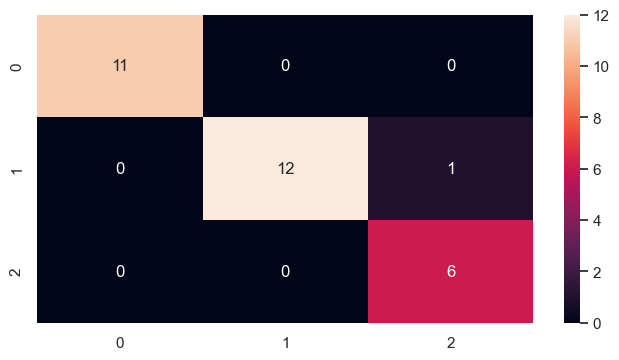

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

